In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("C:/Users/Dell/Downloads/snakes/data.csv")

In [3]:
data.head()

,Family,Scientific name,Common name(s),Red List status,Population trend
0,BOLYERIDAE,Bolyeria multocarinata,Round Island Burrowing Boa,EX,NaN
1,DIPSADIDAE,Borikenophis sanctaecrucis,Saint Croix Racer,EX,NaN
2,TYPHLOPIDAE,Typhlops cariei,NaN,EX,NaN
3,ELAPIDAE,Aipysurus apraefrontalis,"Sahul Reef Snake, Short-nosed Sea Snake",CR,decreasing
4,ELAPIDAE,Aipysurus foliosquama,Leaf-scaled Sea Snake,CR,decreasing


In [4]:
data.tail()

,Family,Scientific name,Common name(s),Red List status,Population trend
244,TYPHLOPIDAE,Typhlops syntherus,Barahona Peninsula Blindsnake,NT,unknown
245,VIPERIDAE,Vipera barani,NaN,NT,decreasing
246,VIPERIDAE,Vipera lotievi,Lotiev's Viper,NT,decreasing
247,VIPERIDAE,Vipera monticola,Atlas Dwarf Viper,NT,decreasing
248,VIPERIDAE,Vipera transcaucasiana,Transcaucasian Long-nosed Viper,NT,decreasing


In [5]:
data.describe()

,Family,Scientific name,Common name(s),Red List status,Population trend
count,249,249,174,249,219
unique,18,249,174,5,4
top,VIPERIDAE,Bolyeria multocarinata,Round Island Burrowing Boa,VU,decreasing
freq,56,1,1,86,118


In [6]:
data.isnull().sum()

Family               0
Scientific name      0
Common name(s)      75
Red List status      0
Population trend    30
dtype: int64

In [7]:
data["Red List status"].value_counts()

VU    86
EN    74
NT    58
CR    28
EX     3
Name: Red List status, dtype: int64

In [8]:
data["Common name(s)"].isnull()

0      False
1      False
2       True
3      False
4      False
       ...  
244    False
245     True
246    False
247    False
248    False
Name: Common name(s), Length: 249, dtype: bool

In [9]:
data["Family"].value_counts()

VIPERIDAE             56
COLUBRIDAE            40
PSEUDOXYRHOPHIIDAE    31
DIPSADIDAE            30
ELAPIDAE              29
NATRICIDAE            22
TYPHLOPIDAE           14
CALAMARIIDAE           6
PYTHONIDAE             3
HOMALOPSIDAE           3
BOIDAE                 3
XENOSAURIDAE           3
BOLYERIDAE             2
AMPHISBAENIDAE         2
LAMPROPHIIDAE          2
PROSYMNIDAE            1
XENODERMATIDAE         1
UROPELTIDAE            1
Name: Family, dtype: int64

In [10]:
Viperidae=(data["Family"]=="VIPERIDAE")
df_Viperidae=data[Viperidae]
df_Viperidae.head()

,Family,Scientific name,Common name(s),Red List status,Population trend
6,VIPERIDAE,Bothropoides alcatraz,Alcatrazes Lancehead,CR,stable
7,VIPERIDAE,Bothropoides insularis,"Golden Lancehead, Queimada Island Bothrops",CR,stable
12,VIPERIDAE,Crotalus catalinensis,Santa Catalina Island Rattlesnake,CR,decreasing
13,VIPERIDAE,Crotalus unicolor,Aruba Island Rattlesnake,CR,NaN
21,VIPERIDAE,Montivipera wagneri,Wagner's Viper,CR,decreasing


In [11]:
df_Viperidae.tail()

,Family,Scientific name,Common name(s),Red List status,Population trend
241,VIPERIDAE,Trimeresurus brongersmai,Brongersma's Pit Viper,NT,unknown
245,VIPERIDAE,Vipera barani,NaN,NT,decreasing
246,VIPERIDAE,Vipera lotievi,Lotiev's Viper,NT,decreasing
247,VIPERIDAE,Vipera monticola,Atlas Dwarf Viper,NT,decreasing
248,VIPERIDAE,Vipera transcaucasiana,Transcaucasian Long-nosed Viper,NT,decreasing


In [12]:
df_Viperidae["Population trend"].value_counts()

decreasing    33
unknown       16
stable         4
Name: Population trend, dtype: int64

In [13]:
df_Viperidae.rename(columns={"Population trend":"trend"},inplace=True)
df_Viperidae.head()

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Family,Scientific name,Common name(s),Red List status,trend
6,VIPERIDAE,Bothropoides alcatraz,Alcatrazes Lancehead,CR,stable
7,VIPERIDAE,Bothropoides insularis,"Golden Lancehead, Queimada Island Bothrops",CR,stable
12,VIPERIDAE,Crotalus catalinensis,Santa Catalina Island Rattlesnake,CR,decreasing
13,VIPERIDAE,Crotalus unicolor,Aruba Island Rattlesnake,CR,NaN
21,VIPERIDAE,Montivipera wagneri,Wagner's Viper,CR,decreasing


In [14]:
df1=df_Viperidae.groupby(["Scientific name","Red List status"]).count()
df1.to_csv("name_status.csv")
df1=pd.read_csv("name_status.csv")
df1=pd.pivot_table(df1,values=None,index=["Scientific name"],columns=["Red List status"],fill_value=0,aggfunc=np.sum)
df1


Common name(s)          Family          trend  \
Red List status                           CR EN NT VU     CR EN NT VU    CR   
Scientific name                                                               
Agkistrodon bilineatus                     0  0  0  0      0  0  1  0     0   
Atheris barbouri                           0  0  0  1      0  0  0  1     0   
Atheris ceratophora                        0  0  0  1      0  0  0  1     0   
Atheris hirsuta                            0  0  0  1      0  0  0  1     0   
Bitis inornata                             0  0  0  1      0  0  0  1     0   
Bitis schneideri                           0  0  0  1      0  0  0  1     0   
Bothriechis aurifer                        0  0  0  1      0  0  0  1     0   
Bothriechis rowleyi                        0  0  0  1      0  0  0  1     0   
Bothropoides alcatraz                      1  0  0  0      1  0  0  0     1   
Bothropoides insularis                     1  0  0  0      1  0  0  0     1   
Bothrops lojanus                           0  1  0  0      0  1  0  0     0   
Bothrops pirajai                           0  0  0  1      0  0  0  1     0   
Crotalus catalinensis                      1  0  0  0      1  0  0  0     1   
Crotalus pusillus                          0  0  0  0      0  1  0  0     0   
Crotalus stejnegeri                        0  0  0  0      0  0  0  1     0   
Crotalus unicolor                          1  0  0  0      1  0  0  0     0   
Cryptelytrops honsonensis                  0  0  0  1      0  0  0  1     0   
Cryptelytrops kanburiensis                 0  1  0  0      0  1  0  0     0   
Cryptelytrops rubeus                       0  0  0  1      0  0  0  1     0   
Daboia deserti                             0  0  1  0      0  0  1  0     0   
Daboia mauritanica                         0  0  1  0      0  0  1  0     0   
Gloydius shedaoensis                       0  0  0  1      0  0  0  1     0   
Macrovipera schweizeri                     0  1  0  0      0  1  0  0     0   
Mixcoatlus barbouri                        0  1  0  0      0  1  0  0     0   
Mixcoatlus melanurus                       0  0  0  0      0  1  0  0     0   
Montivipera albicornuta                    0  0  0  0      0  0  0  1     0   
Montivipera albizona                       0  1  0  0      0  1  0  0     0   
Montivipera bornmuelleri                   0  1  0  0      0  1  0  0     0   
Montivipera latifii                        0  1  0  0      0  1  0  0     0   
Montivipera raddei                         0  0  1  0      0  0  1  0     0   
Montivipera wagneri                        1  0  0  0      1  0  0  0     1   
Ophryacus undulatus                        0  0  0  0      0  0  0  1     0   
Parias malcolmi                            0  0  1  0      0  0  1  0     0   
Popeia buniana                             0  1  0  0      0  1  0  0     0   
Popeia nebularis                           0  0  0  1      0  0  0  1     0   
Protobothrops cornutus                     0  0  1  0      0  0  1  0     0   
Protobothrops mangshanensis                0  1  0  0      0  1  0  0     0   
Protobothrops sieversorum                  0  1  0  0      0  1  0  0     0   
Protobothrops trungkhanhensis              0  1  0  0      0  1  0  0     0   
Trimeresurus brongersmai                   0  0  1  0      0  0  1  0     0   
Vipera anatolica                           0  0  0  0      1  0  0  0     1   
Vipera barani                              0  0  0  0      0  0  1  0     0   
Vipera darevskii                           1  0  0  0      1  0  0  0     1   
Vipera dinniki                             0  0  0  1      0  0  0  1     0   
Vipera ebneri                              0  0  0  1      0  0  0  1     0   
Vipera eriwanensis                         0  0  0  1      0  0  0  1     0   
Vipera kaznakovi                           0  1  0  0      0  1  0  0     0   
Vipera latastei                            0  0  0  1      0  0  0  1     0   
V

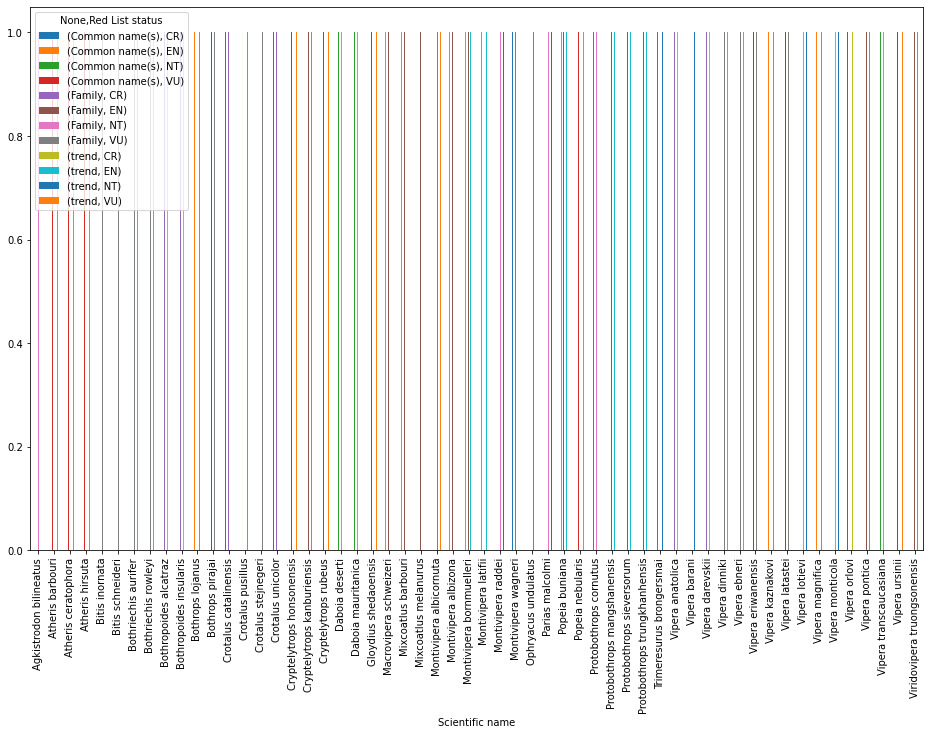

In [15]:
df1.plot(kind="bar",figsize=(16,10))
plt.show()

In [28]:
inputs=df_Viperidae.drop("Red List status",axis=1)
target=df_Viperidae["Red List status"]

In [29]:
inputs

,Family,Scientific name,Common name(s),trend
6,VIPERIDAE,Bothropoides alcatraz,Alcatrazes Lancehead,stable
7,VIPERIDAE,Bothropoides insularis,"Golden Lancehead, Queimada Island Bothrops",stable
12,VIPERIDAE,Crotalus catalinensis,Santa Catalina Island Rattlesnake,decreasing
13,VIPERIDAE,Crotalus unicolor,Aruba Island Rattlesnake,NaN
21,VIPERIDAE,Montivipera wagneri,Wagner's Viper,decreasing
27,VIPERIDAE,Vipera anatolica,NaN,decreasing
28,VIPERIDAE,Vipera darevskii,Darevsky's Viper,decreasing
29,VIPERIDAE,Vipera orlovi,Orlov's Viper,decreasing
42,VIPERIDAE,Bothrops lojanus,Lojan Lancehead,unknown
49,VIPERIDAE,Crotalus pusillus,NaN,unknown


In [30]:
target

6      1
7      1
12     1
13     1
21     1
27     1
28     1
29     1
42     2
49     2
50     2
68     2
69     2
70     2
71     2
72     2
73     2
78     2
79     2
80     2
81     2
99     2
100    2
101    2
102    2
108    4
109    4
110    4
115    4
116    4
117    4
118    4
119    4
126    4
127    4
128    4
137    4
152    4
162    4
166    4
185    4
186    4
187    4
188    4
189    4
191    3
201    3
202    3
218    3
230    3
231    3
241    3
245    3
246    3
247    3
248    3
Name: Red List status, dtype: int64

In [31]:
le_Red_List_status=LabelEncoder()

In [34]:
inputs["Red List status_n"]=le_Red_List_status.fit_transform[inputs("Red List status")]

TypeError: 'DataFrame' object is not callable

In [16]:
df_Viperidae.head()

,Family,Scientific name,Common name(s),Red List status,trend
6,VIPERIDAE,Bothropoides alcatraz,Alcatrazes Lancehead,CR,stable
7,VIPERIDAE,Bothropoides insularis,"Golden Lancehead, Queimada Island Bothrops",CR,stable
12,VIPERIDAE,Crotalus catalinensis,Santa Catalina Island Rattlesnake,CR,decreasing
13,VIPERIDAE,Crotalus unicolor,Aruba Island Rattlesnake,CR,NaN
21,VIPERIDAE,Montivipera wagneri,Wagner's Viper,CR,decreasing


In [17]:
#X_train,X_test,Y_train,Y_test=train_test_split(df_Viperidae.drop("Red List status",axis=1),df_Viperidae["Red List status"],test_size=0.2,random_state=0)

In [18]:
#le=LabelEncoder()

In [19]:
#le.fit(Y_train)

In [20]:
#le.classes_

In [21]:
#pd.Series(le.transform(Y_train))

In [22]:
df_Viperidae.replace(['CR', 'EN', 'NT', 'VU'],(1,2,3,4),inplace=True)

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


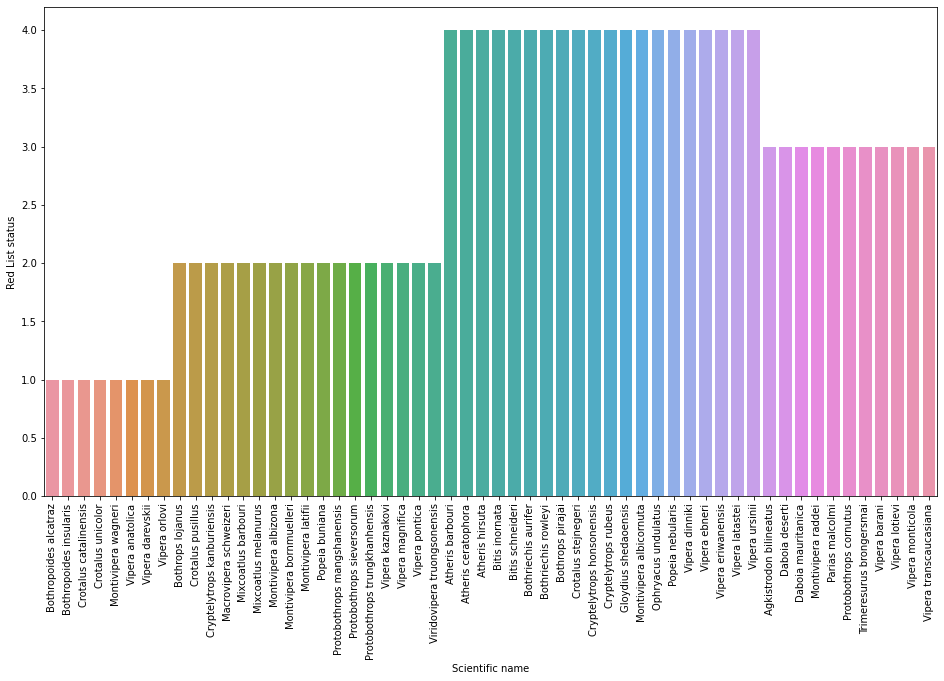

In [23]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
sns.barplot(x="Scientific name",y="Red List status",data=df_Viperidae)

plt.show()

In [24]:
df_Viperidae["Red List status"].value_counts()

4    20
2    17
3    11
1     8
Name: Red List status, dtype: int64